In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cleaned = pd.read_csv('adult(cleaned).csv')

### Splitting Train test

In [4]:
x = df_cleaned.drop('income', axis = 1)
y = df_cleaned[['income']]

In [5]:
y.value_counts()

income
0         34611
1         11422
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

### KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
KNN = KNeighborsClassifier(n_neighbors=14)

In [10]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [11]:
y_pred = KNN.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

### Score after normalizing and cleaning dataset (KNN)

In [13]:
def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

#### Score with stratified split

accuracy : 0.8330002606655661
recall : 0.5759803921568627
precision : 0.6982173174872666
f1 : 0.6312356101304681
confusion matrix: [[7942  711]
 [1211 1645]]


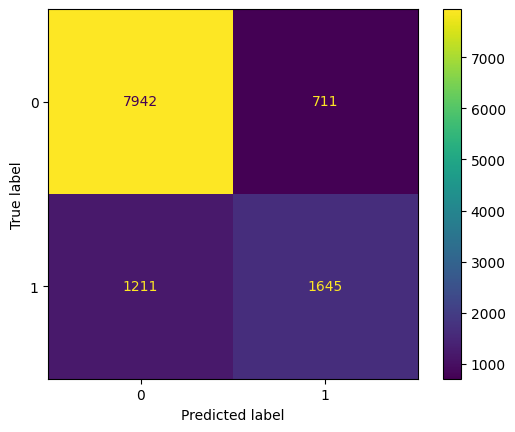

In [14]:
metrics(y_test, y_pred)
cm_stratified = confusion_matrix(y_test, y_pred)

#### score with non stratified split

accuracy : 0.826483621513598
recall : 0.5486542443064182
precision : 0.6976744186046512
f1 : 0.6142553602472475
confusion matrix: [[7922  689]
 [1308 1590]]


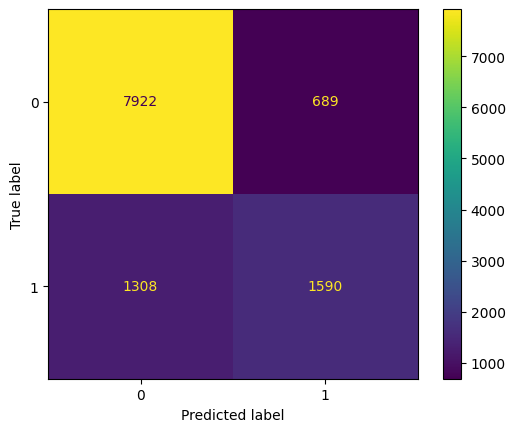

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)
cm_non_stratified = confusion_matrix(y_test, y_pred)

#### Stratified vs Non Stratified

In [16]:
cm_stratified = [j for sub in cm_stratified for j in sub]

In [17]:
cm_non_stratified =  [j for sub in cm_non_stratified for j in sub]

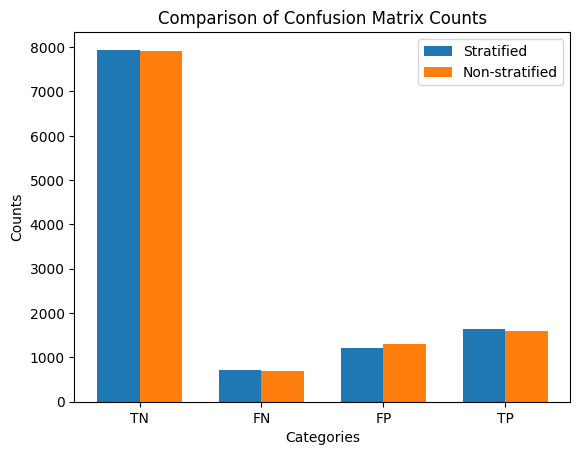

In [18]:
# Labels for the categories
categories = ['TN', 'FN', 'FP', 'TP']

# Number of categories
n = len(categories)

# Positions of the bars on the x-axis
bar_width = 0.35  # Width of each bar
index = np.arange(n)  # The label locations

# Plotting the bars
fig, ax = plt.subplots()

bar1 = ax.bar(index, cm_stratified, bar_width, label='Stratified')
bar2 = ax.bar(index + bar_width, cm_non_stratified, bar_width, label='Non-stratified')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Confusion Matrix Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.show()

#### Trying to run it on train data

accuracy : 0.8526242613833854
recall : 0.6133270764899108
precision : 0.7447293447293447
f1 : 0.6726711271230057
confusion matrix: [[24208  1792]
 [ 3296  5228]]


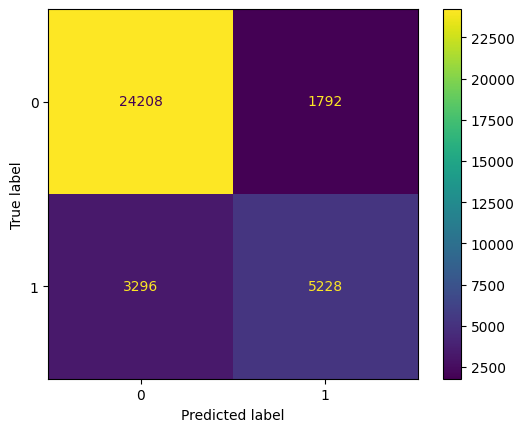

In [19]:
y_pred = KNN.predict(x_train)
metrics(y_train, y_pred)

### Score with a non normalized dataset (KNN)

In [20]:
df_cleaned_non_normalized = pd.read_csv("adult(cleaned non normalized).csv")

In [21]:
x = df_cleaned_non_normalized.drop('income', axis = 1)
y = df_cleaned_non_normalized[['income']]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42)

In [23]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
accuracy_score(y_test, y_pred)

0.7055299539170506

accuracy : 0.7055299539170506
recall : 0.11203949867071782
precision : 0.2560763888888889
f1 : 0.15587846763540292
confusion matrix: [[7360  857]
 [2338  295]]


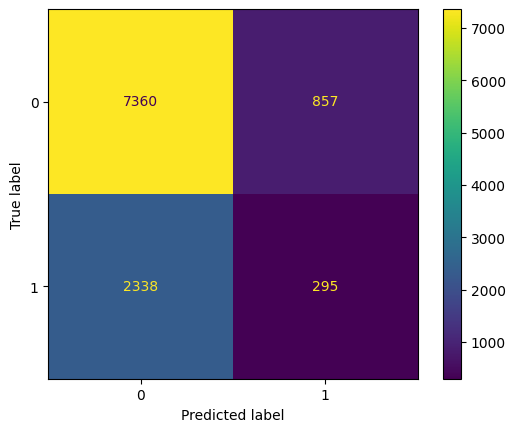

In [24]:
metrics(y_test, y_pred)

### Score with standardized data

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y.values.ravel(), random_state=42)

accuracy : 0.7583410138248848
recall : 0.44663881503987846
precision : 0.5023494233233661
f1 : 0.47285886610373945
confusion matrix: [[7052 1165]
 [1457 1176]]


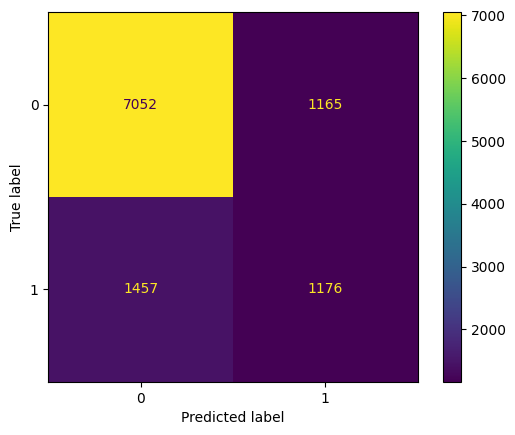

In [27]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)

accuracy : 0.7583410138248848
recall : 0.44663881503987846
precision : 0.5023494233233661
f1 : 0.47285886610373945
confusion matrix: [[7052 1165]
 [1457 1176]]


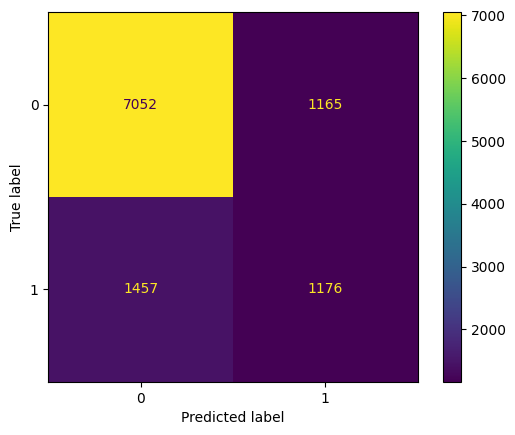

In [28]:
metrics(y_test, y_pred)

### All columns cleaned of skewness

In [29]:
df_cleaned_all = pd.read_csv("adult(cleaned all column).csv")

In [30]:
x = df_cleaned_all.drop('income', axis = 1)
y = df_cleaned_all[['income']]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), test_size=0.2, random_state=42)

accuracy : 0.8239383078092756
recall : 0.544136460554371
precision : 0.6980306345733042
f1 : 0.6115504433261443
confusion matrix: [[6310  552]
 [1069 1276]]


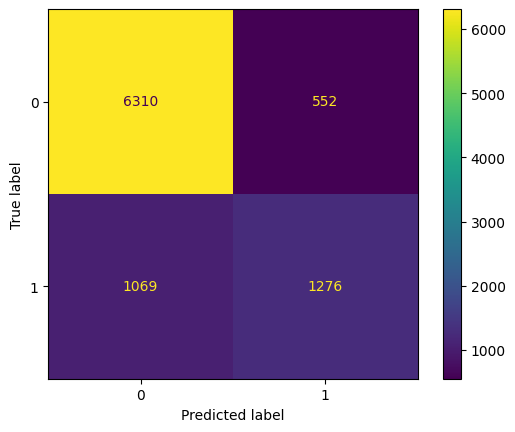

In [32]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
metrics(y_test, y_pred)
